# Exploratory Data Analysis

In [1]:
# import libraries and load dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid',color_codes=True)
sns.set(font_scale =1)

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
print('Training data shape:'+ str(data_train.shape))
print('Test data shape:'+ str(data_test.shape))

Training data shape:(1460, 81)
Test data shape:(1459, 80)


In [3]:
# Data Types of Features
data_train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [4]:
# Missing Values in the training set
data_test.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       227
GarageCond         78
GarageQual         78
GarageYrBlt        78
GarageFinish       78
GarageType         76
BsmtCond           45
BsmtQual           44
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
MasVnrType         16
MasVnrArea         15
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
SaleType            1
Exterior1st         1
                 ... 
OverallQual         0
SaleCondition       0
Heating             0
ExterQual           0
TotRmsAbvGrd        0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive

In [5]:
# Target Variable Analysis
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

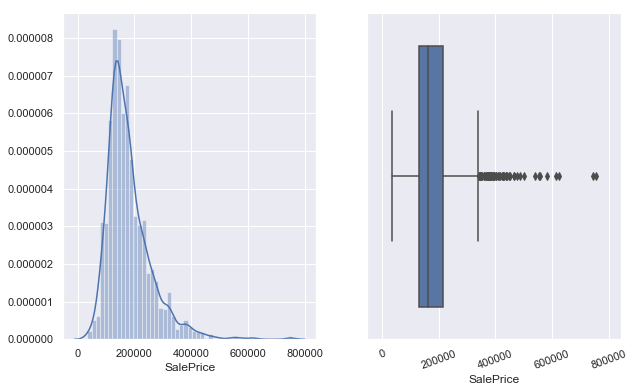

In [6]:
fig,ax = plt.subplots(1,2,figsize=(10,6),sharex=True)
sns.distplot(data_train['SalePrice'],ax =ax[0])
sns.boxplot(data_train['SalePrice'],ax = ax[1])
plt.xticks(rotation=20)
plt.show()

In [7]:
print("Skewness: %f " % data_train['SalePrice'].skew())
print("Kurtosis: %f " % data_train['SalePrice'].kurt())

Skewness: 1.882876 
Kurtosis: 6.536282 


In [8]:
# Log transformation on target variable
data_train['SalePrice'] = data_train['SalePrice'].apply(lambda x: np.log1p(x))

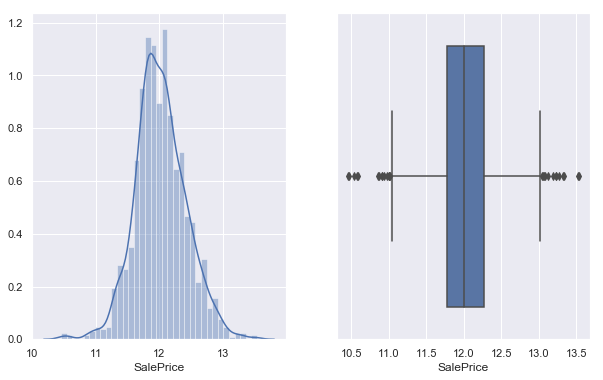

In [9]:
fig,ax = plt.subplots(1,2,figsize=(10,6))
sns.distplot(data_train['SalePrice'],ax =ax[0])
sns.boxplot(data_train['SalePrice'],ax = ax[1])
plt.show()
# We see the reduction in skewness after the transformation

In [10]:
# Exploring Categorical Features
cat_cols = []
for cols in data_train.select_dtypes(include =['object']).columns:
    cat_cols.append(cols)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
data_train[cat_cols].head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


Text(0,0.5,'Sale Price')

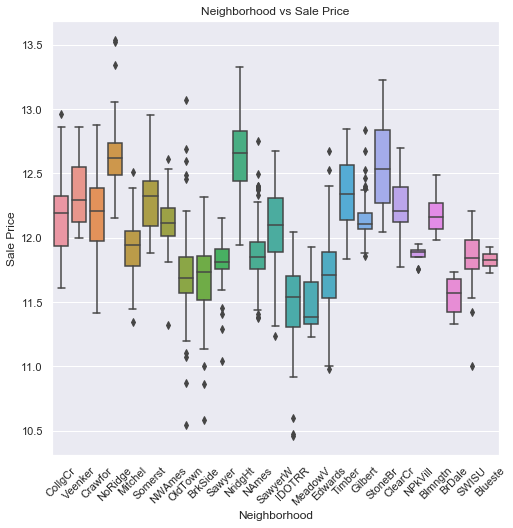

In [12]:
# Neighborhood vs Sale Price
plt.subplots(figsize=(8,8))
sns.boxplot('Neighborhood','SalePrice',data = data_train)
plt.xticks(rotation=45)
plt.title('Neighborhood vs Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
# Seems like the median Sale Price are higher at No Ridge,SawyerW and StoneBR

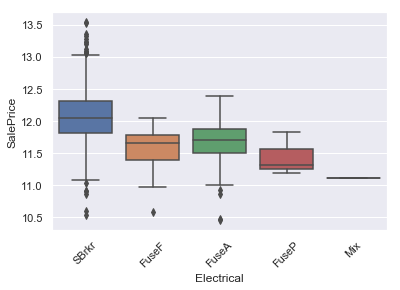

In [13]:
sns.boxplot('Electrical','SalePrice',data = data_train)
plt.xticks(rotation=45)
plt.show()

In [14]:
# Garage Cars against Target
data_train.groupby(['GarageCars']).agg({'SalePrice':np.mean})

,SalePrice
GarageCars,
0,11.491885
1,11.731876
2,12.083619
3,12.583594
4,12.137204


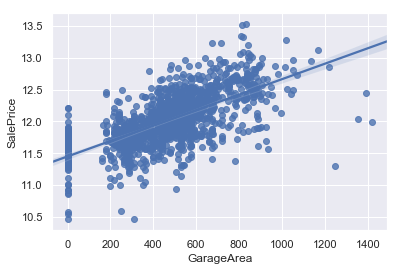

In [15]:
sns.regplot(x=data_train['GarageArea'],y=data_train['SalePrice'])

In [16]:
data_train.groupby(['GarageCond']).agg({'SalePrice':np.mean})

,SalePrice
GarageCond,
Ex,11.727646
Fa,11.596890
Gd,12.050621
Po,11.572888
TA,12.070489


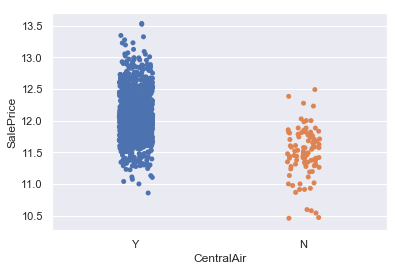

In [17]:
sns.stripplot(x=data_train['CentralAir'],y=data_train['SalePrice'],jitter=True)

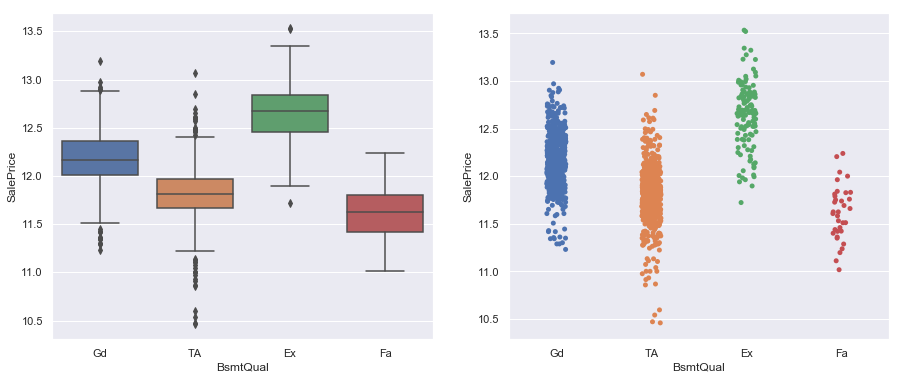

In [18]:
plt.subplots(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'BsmtQual', y ='SalePrice',data = data_train)
plt.subplot(1,2,2)
sns.stripplot(x='BsmtQual',y='SalePrice',jitter=True,data=data_train)
plt.show()

In [19]:
data_train = data_train.drop(columns=['Id'])

In [20]:
# Exploring relationship between numerical features to Target 
num_cols = []
for cols in data_train.select_dtypes(exclude =['object']).columns:
    num_cols.append(cols)
print('There are ' + str(len(num_cols)) + ' numerical features')

There are 37 numerical features


In [21]:
y = ['SalePrice']
num_feat = [i for i in num_cols if i not in y]

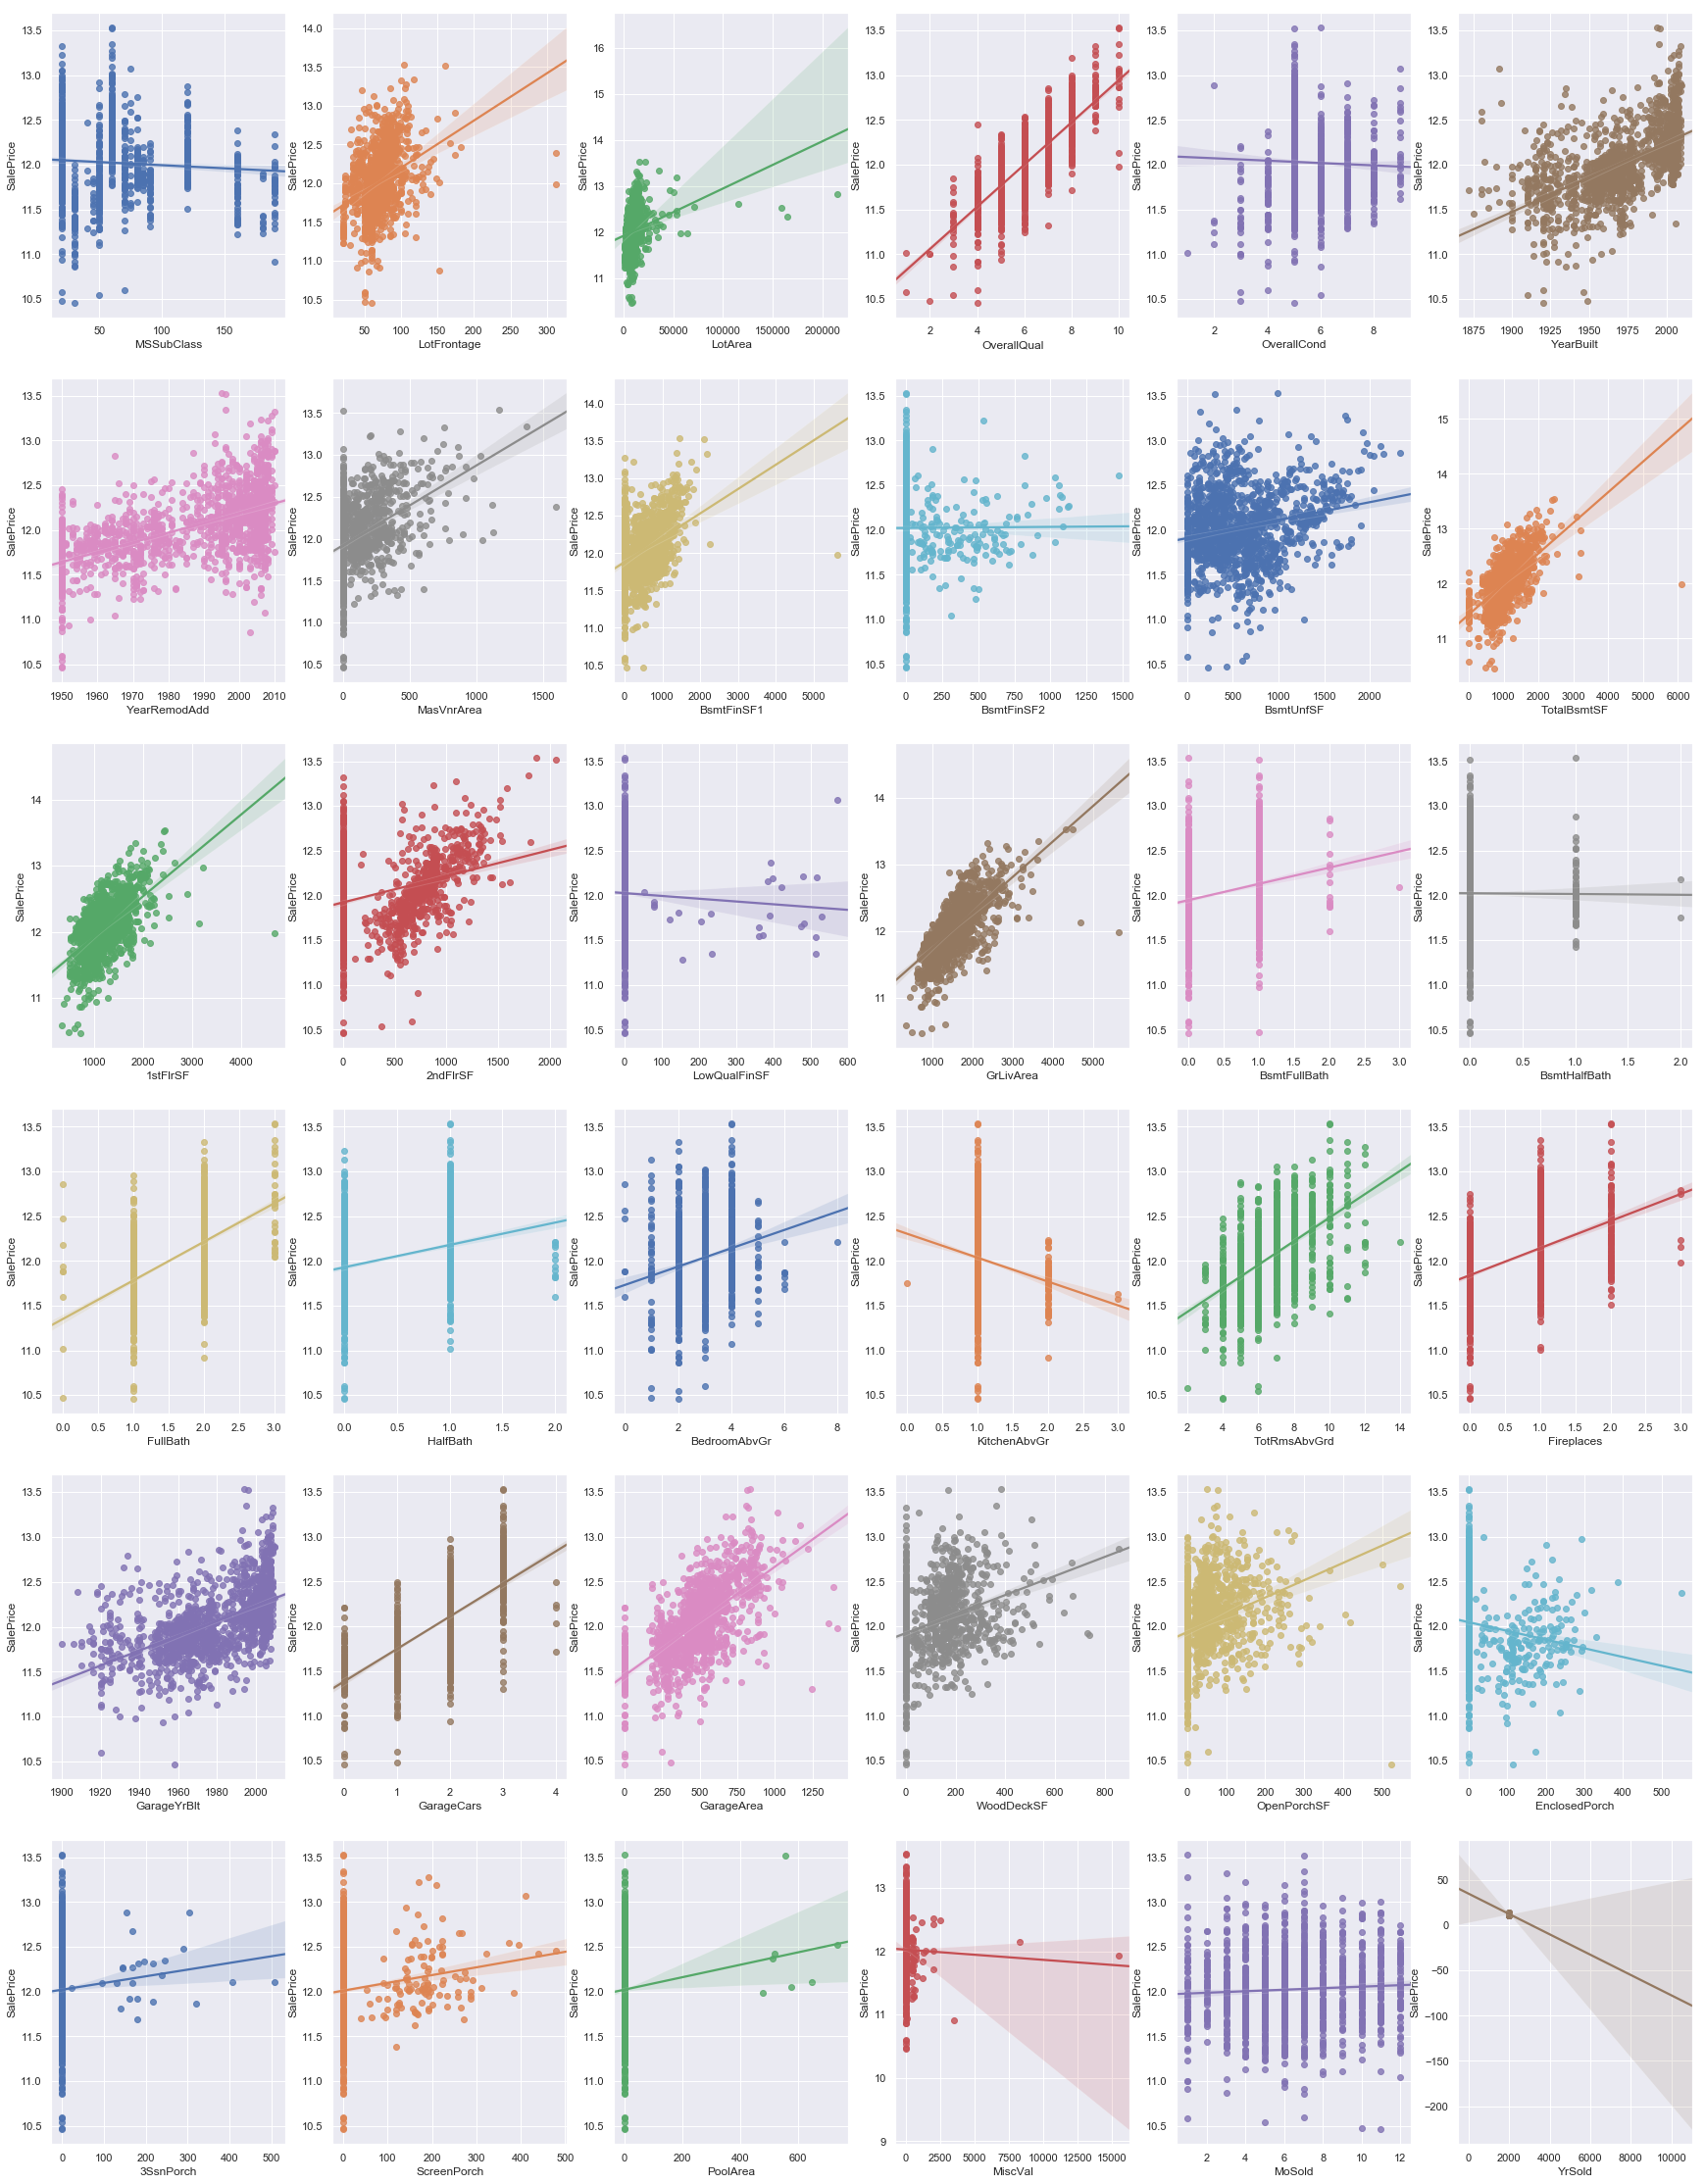

In [22]:
fig,axes = plt.subplots(6,6,figsize=(30,40))
axes = axes.flatten()
for i, xi in enumerate(data_train[num_feat]):
    sns.regplot(x=xi, y = data_train['SalePrice'],ax = axes[i],data=data_train[num_feat])

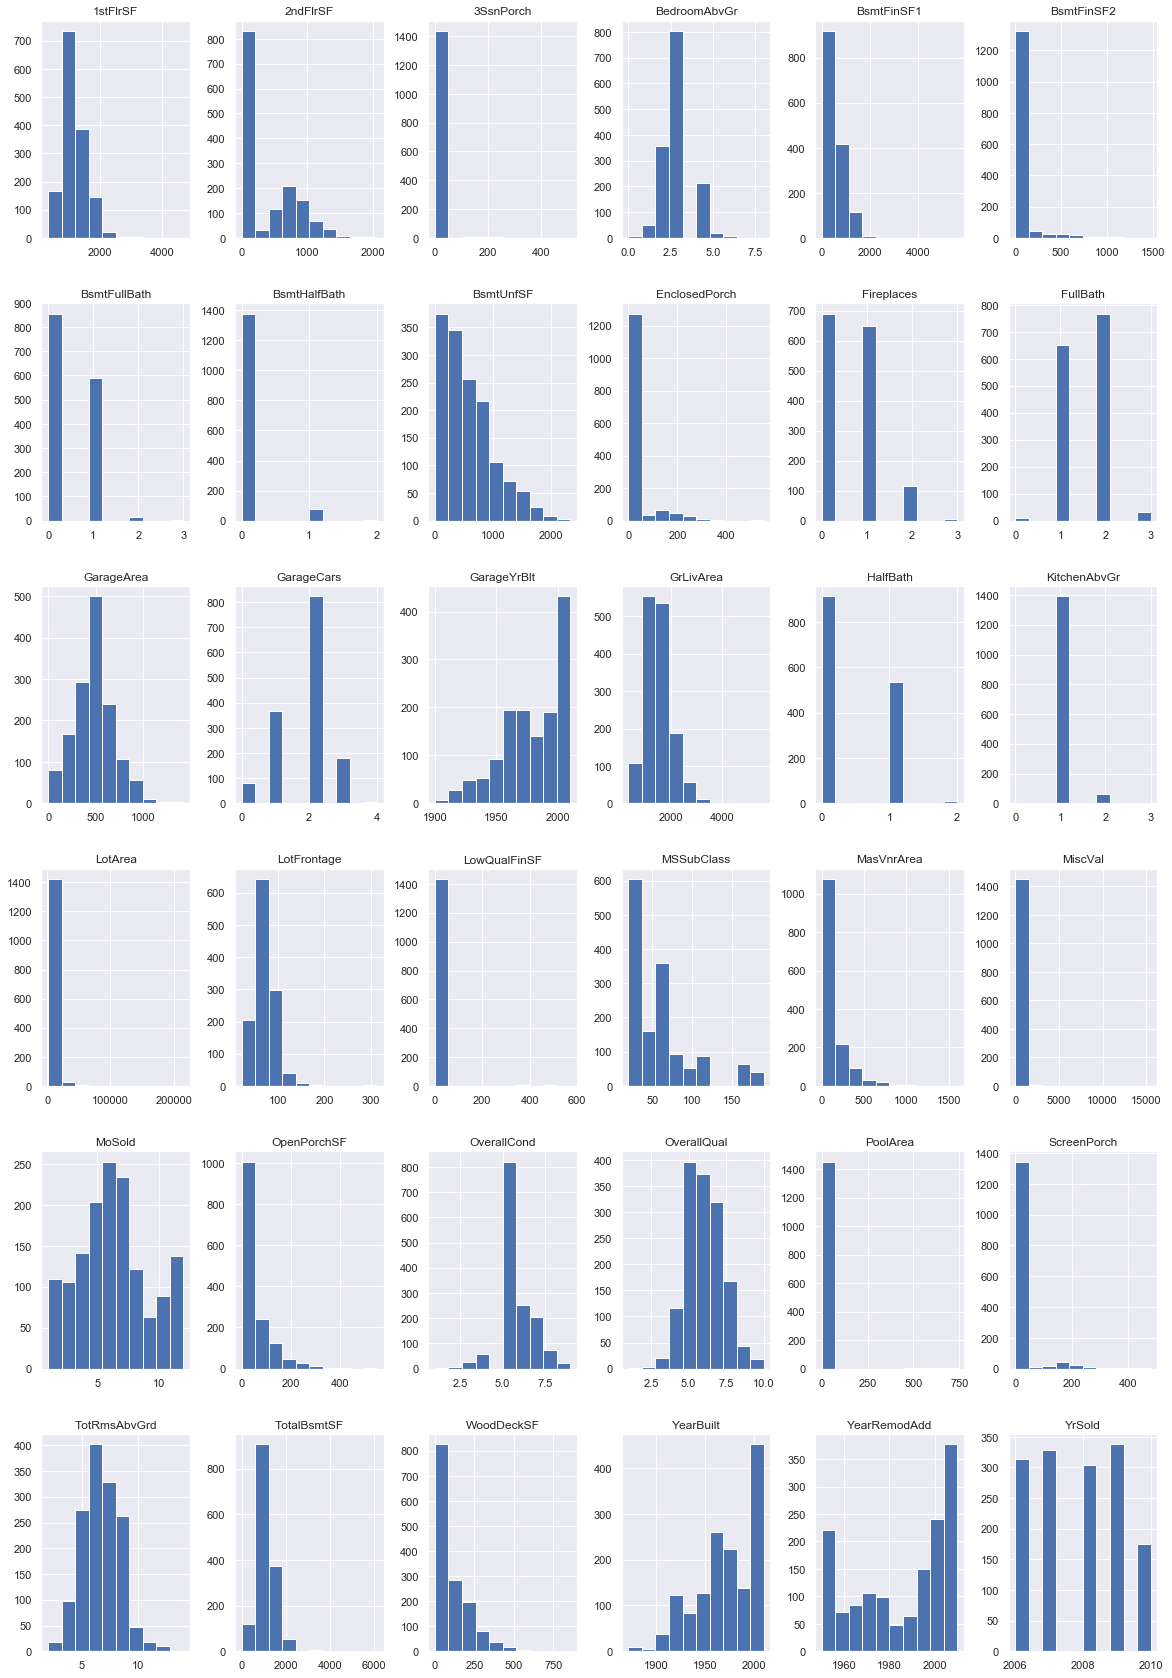

In [23]:
# Visualizing distributions of numeric features
data_train[num_feat].hist(figsize = (20,30))
plt.show()

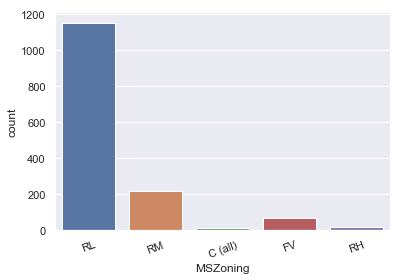

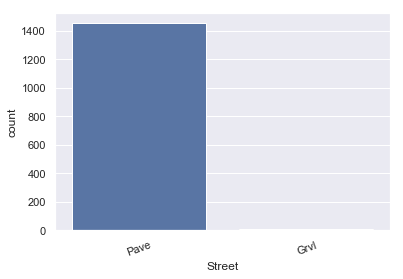

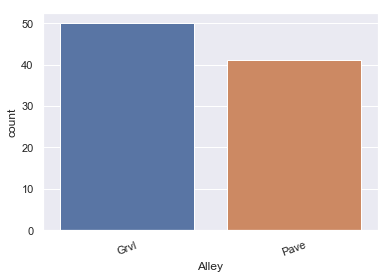

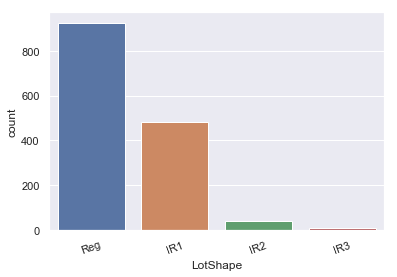

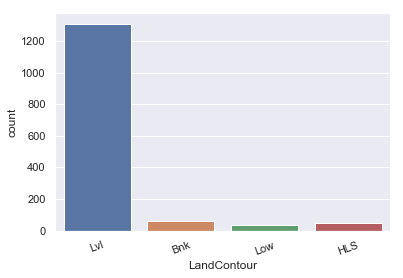

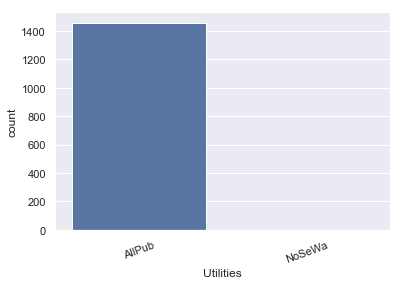

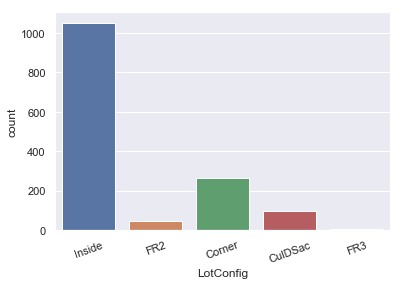

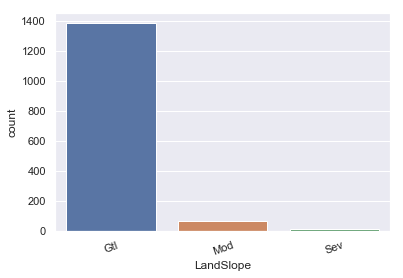

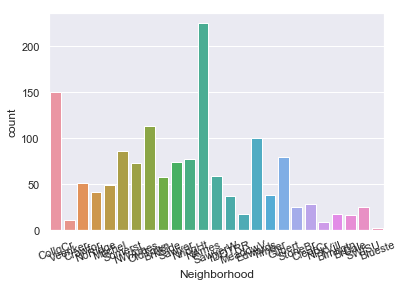

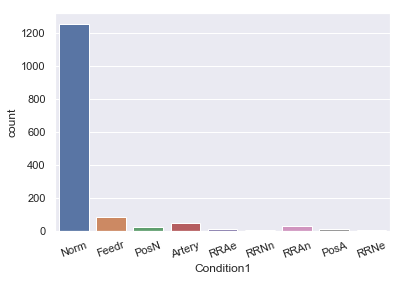

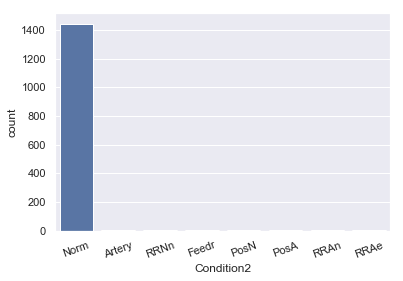

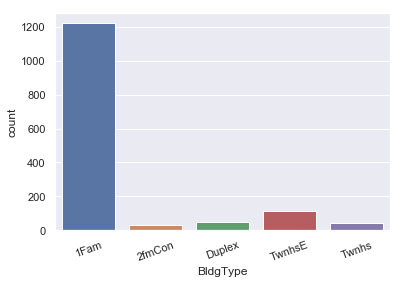

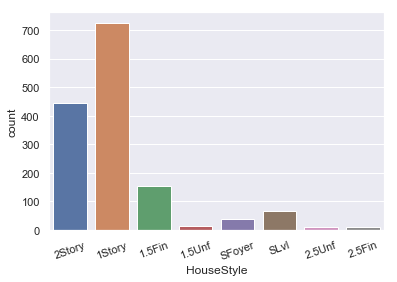

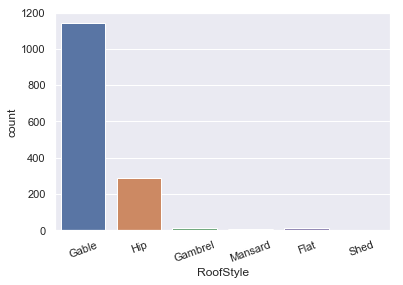

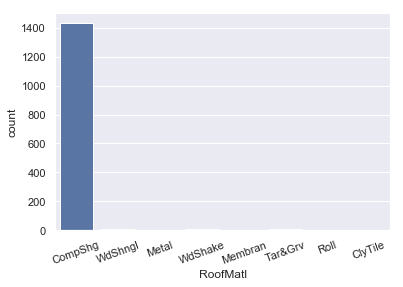

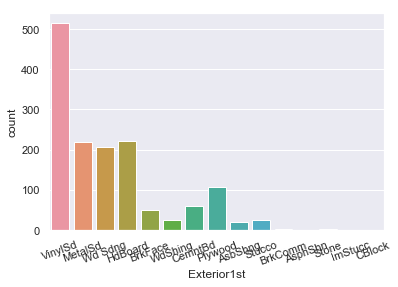

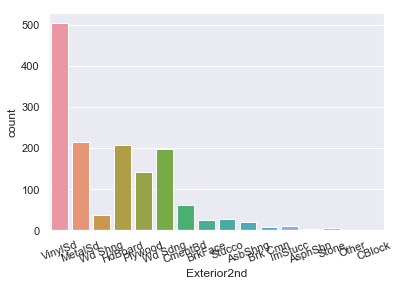

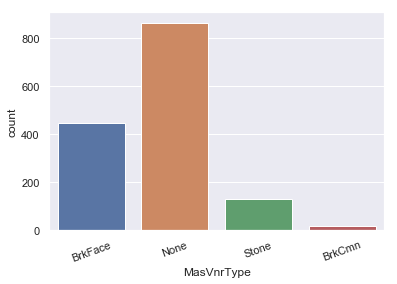

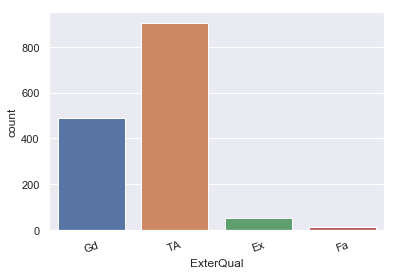

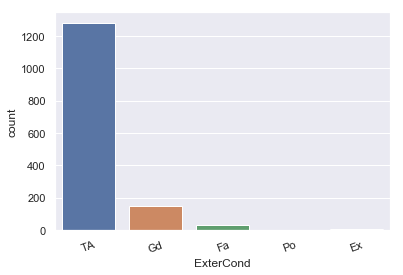

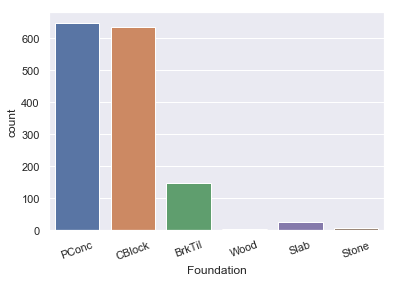

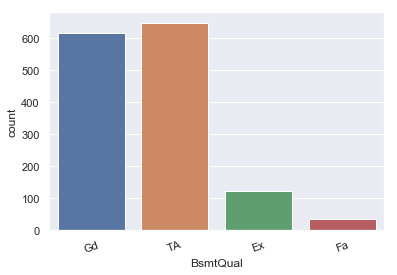

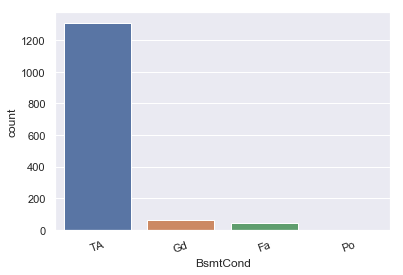

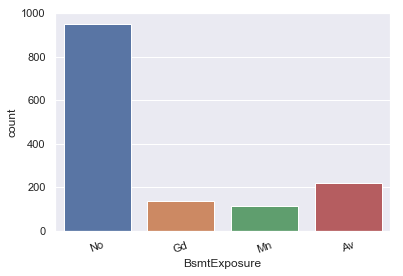

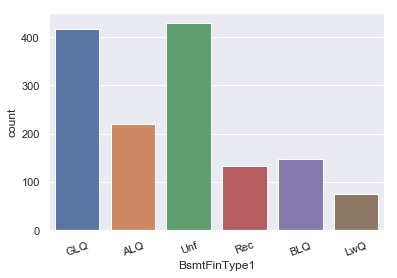

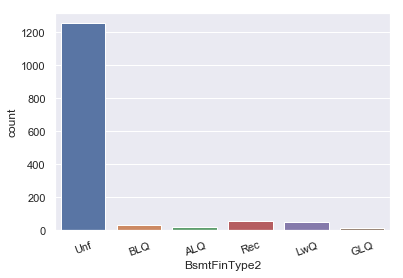

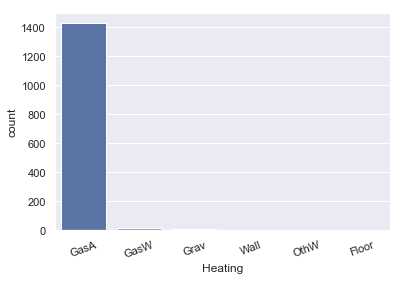

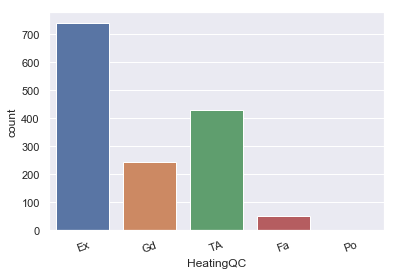

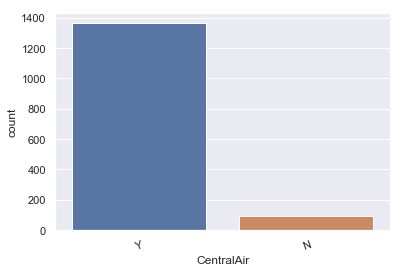

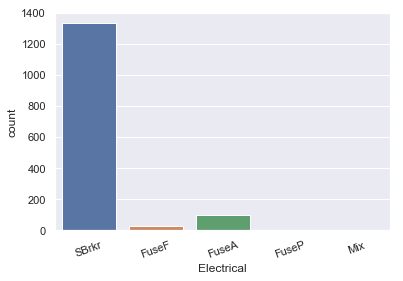

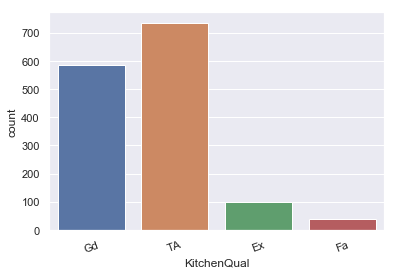

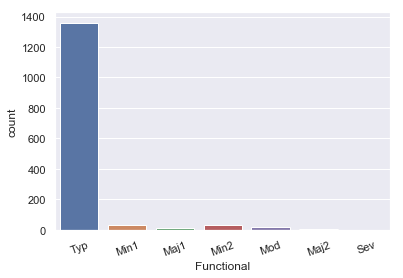

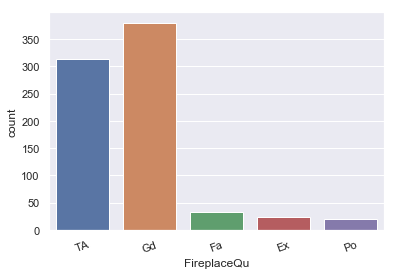

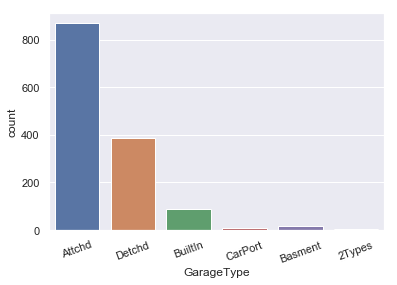

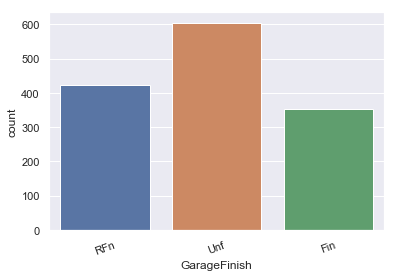

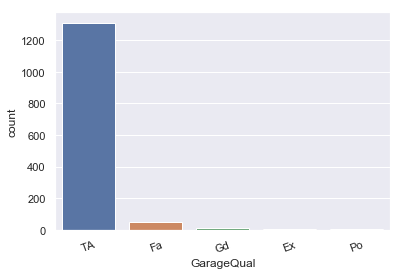

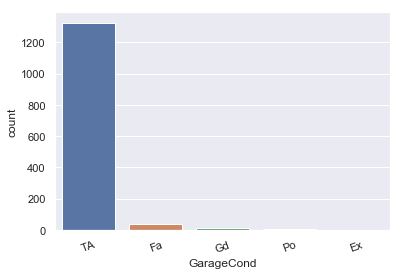

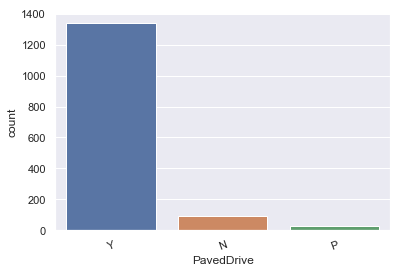

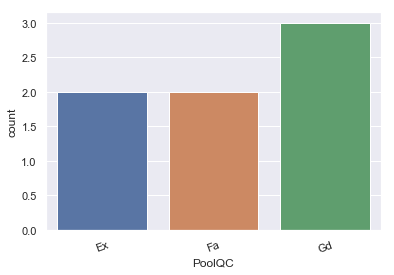

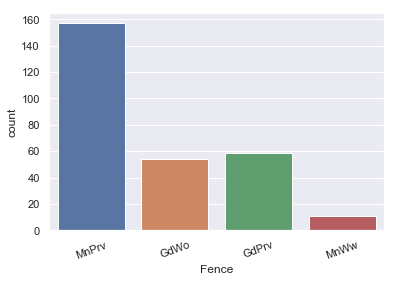

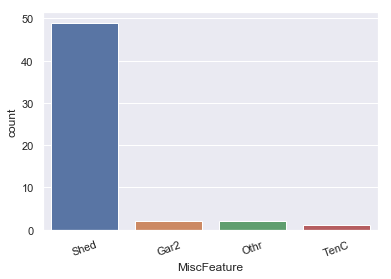

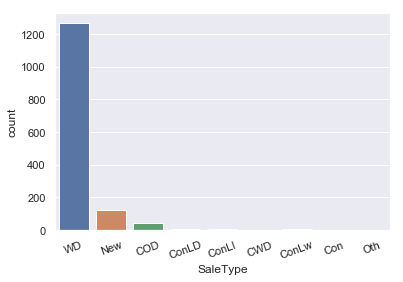

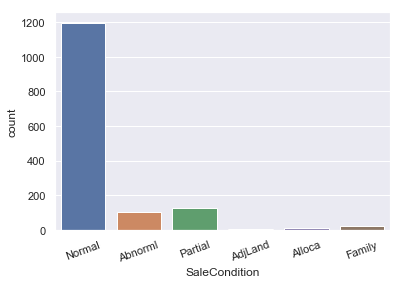

In [24]:
for i,col in enumerate(data_train.select_dtypes(include =['object']).columns):
    sns.countplot(data_train[col])
    plt.xticks(rotation=20)
    plt.show()

In [25]:
data_train = data_train.drop(columns=['Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','RoofMatl','ExterCond',
                         'BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','PavedDrive'])
# Delete columns dominated by a single category as they don't add to the variability of the target

In [26]:
# Missing Value Ratio
miss_val = data_train.isnull().sum()/len(data_train)*100
miss_val = miss_val.drop(miss_val[miss_val==0].index).sort_values(ascending=False)

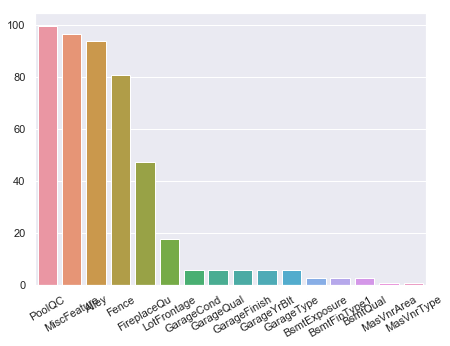

In [27]:
plt.subplots(figsize=(7,5))
sns.barplot(x=miss_val.index,y=miss_val)
plt.xticks(rotation=30)
plt.show()


In [28]:
# Drop Features with over 80% missing values
data_train = data_train.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])
data_train.shape

(1460, 59)

In [29]:
data_train.isnull().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageType        81
GarageQual        81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
ExterQual          0
BsmtFinSF1         0
BsmtFinSF2         0
Exterior2nd        0
BsmtUnfSF          0
Foundation         0
SalePrice          0
HeatingQC          0
Exterior1st        0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
HouseStyle         0
Neighborhood       0
LotShape           0
LotArea            0
MSZoning           0
TotalBsmtSF        0
GrLivArea          0
1stFlrSF           0
2ndFlrSF           0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces   

In [30]:
# Missing Value imputation for both categorical and numeric features
miss_cat = ['FireplaceQu','GarageFinish','GarageType','BsmtExposure','BsmtQual','BsmtFinType1','GarageCond','MasVnrType','GarageQual']
miss_num = ['LotFrontage','GarageYrBlt','MasVnrArea']
data_train[miss_cat] = data_train[miss_cat].apply(lambda x:x.fillna(x.value_counts().index[0]))
data_train[miss_num] = data_train[miss_num].apply(lambda x:x.fillna(x.mean()))

In [31]:
data_train.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
LotShape         False
Neighborhood     False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
Foundation       False
BsmtQual         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
HeatingQC        False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars 

# Feature Engineering

In [32]:
#cat_col = data_train.select_dtypes(include='object').columns.tolist()

In [33]:
# Correlation between numeric features to Target
correl = data_train.select_dtypes(exclude = 'object').corr()
correl['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489450
MasVnrArea       0.429532
BsmtFinSF1       0.372023
LotFrontage      0.336156
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

In [34]:
# Adding all bathroom variables
tot_bath = pd.DataFrame({'TotalBath': data_train['BsmtFullBath']+data_train['BsmtHalfBath']+data_train['FullBath']+data_train['HalfBath']})

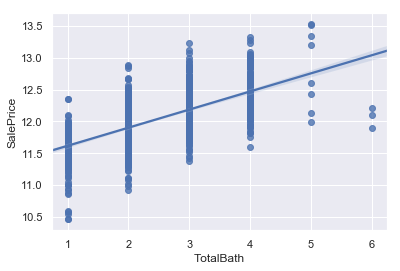

In [35]:
sns.regplot(x=tot_bath['TotalBath'], y = data_train['SalePrice'])

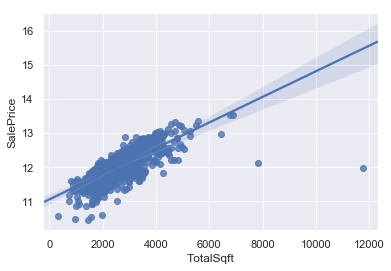

In [36]:
# Total living space above and below ground
tot_sqft = pd.DataFrame({'TotalSqft': data_train['GrLivArea']+data_train['TotalBsmtSF']})
sns.regplot(x=tot_sqft['TotalSqft'], y = data_train['SalePrice'])

In [37]:
# Aggregating Neighborhood based on Sale Price
data_train['SalePrice_O'] = data_train['SalePrice'].apply(lambda x: np.exp(x)-1)
n_hood = data_train.groupby(['Neighborhood']).agg({'SalePrice_O':np.mean}).sort_values(by ='SalePrice_O',ascending=False)
n_hood

,SalePrice_O
Neighborhood,
NoRidge,335295.317073
NridgHt,316270.623377
StoneBr,310499.000000
Timber,242247.447368
Veenker,238772.727273
Somerst,225379.837209
ClearCr,212565.428571
Crawfor,210624.725490
CollgCr,197965.773333


In [38]:
n_hood.index

Index(['NoRidge', 'NridgHt', 'StoneBr', 'Timber', 'Veenker', 'Somerst',
       'ClearCr', 'Crawfor', 'CollgCr', 'Blmngtn', 'Gilbert', 'NWAmes',
       'SawyerW', 'Mitchel', 'NAmes', 'NPkVill', 'SWISU', 'Blueste', 'Sawyer',
       'OldTown', 'Edwards', 'BrkSide', 'BrDale', 'IDOTRR', 'MeadowV'],
      dtype='object', name='Neighborhood')

In [39]:
# Binning Neighborhood based on the groupby results
data_train['neig_hood'] = data_train.Neighborhood.map({'NoRidge':0, 'NridgHt':0, 'StoneBr':0, 'Timber':1, 'Veenker':1, 'Somerst':1,
       'ClearCr':1, 'Crawfor':1, 'CollgCr':1, 'Blmngtn':1, 'Gilbert':1, 'NWAmes':1,
       'SawyerW':1, 'Mitchel':2, 'NAmes':2, 'NPkVill':2, 'SWISU':2, 'Blueste':2, 'Sawyer':2,
       'OldTown':2, 'Edwards':2, 'BrkSide':2, 'BrDale':2, 'IDOTRR':2, 'MeadowV':2})

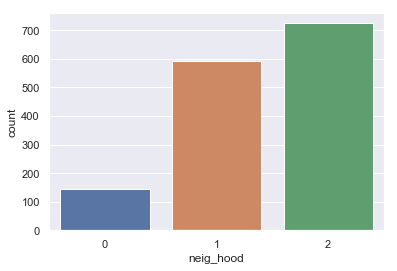

In [40]:
sns.countplot(data_train['neig_hood'])

In [41]:
data_train = pd.concat([data_train, tot_sqft,tot_bath], axis=1)
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'SalePrice_O', 'neig_hood', 'TotalSqft', 'TotalBath'],
      dtype='object')

In [42]:
data_train = data_train.drop(columns=['FullBath','HalfBath','GrLivArea','TotalBsmtSF'])

# Feature Selection

In [43]:
# Fit a simple XGBoost Regressor to find important features
cat_cols1 = data_train.select_dtypes(include='object').columns.tolist()
num_cols1 = data_train.select_dtypes(exclude = 'object').columns.tolist()


In [44]:
data_tr = pd.concat([data_train[num_cols1],data_train[cat_cols1]],axis=1)

In [45]:
# Label Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
data_tr[cat_cols1] = data_tr[cat_cols1].apply(LabelEncoder().fit_transform)

In [46]:
targets = ['SalePrice','SalePrice_O']
x =  [i for i in data_tr if i not in targets]

In [47]:
# Random Forest Regressor for Variable Importance
from xgboost import XGBRegressor
from xgboost import plot_importance
model_xg = XGBRegressor()
model = model_xg.fit(data_tr[x],data_tr[y])
model.feature_importances_

array([0.02802102, 0.02451839, 0.0788091 , 0.04028021, 0.0910683 ,
       0.0525394 , 0.01751314, 0.00350263, 0.04378284, 0.00175131,
       0.04028021, 0.04028021, 0.02101576, 0.        , 0.00175131,
       0.        , 0.00350263, 0.00700525, 0.00525394, 0.01401051,
       0.02977233, 0.00875657, 0.03677758, 0.01401051, 0.01926445,
       0.00350263, 0.        , 0.02276707, 0.01751314, 0.00175131,
       0.00700525, 0.01225919, 0.01050788, 0.09281962, 0.01926445,
       0.03152364, 0.00175131, 0.01926445, 0.02977233, 0.00350263,
       0.01050788, 0.00175131, 0.00175131, 0.        , 0.01225919,
       0.00350263, 0.00525394, 0.00875657, 0.01050788, 0.01050788,
       0.        , 0.00350263, 0.00350263, 0.        , 0.00175131,
       0.        , 0.02977233], dtype=float32)

In [48]:
features_xgb =  pd.DataFrame({'Feature':data_tr[x].columns, 'Importance':model.feature_importances_})
features_xgb = features_xgb.sort_index(by='Importance',ascending=False)
features_xgb

C:\Users\vdevan2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Feature,Importance
33,TotalSqft,0.092820
4,OverallCond,0.091068
2,LotArea,0.078809
5,YearBuilt,0.052539
8,BsmtFinSF1,0.043783
3,OverallQual,0.040280
10,BsmtUnfSF,0.040280
11,1stFlrSF,0.040280
22,GarageArea,0.036778
35,MSZoning,0.031524


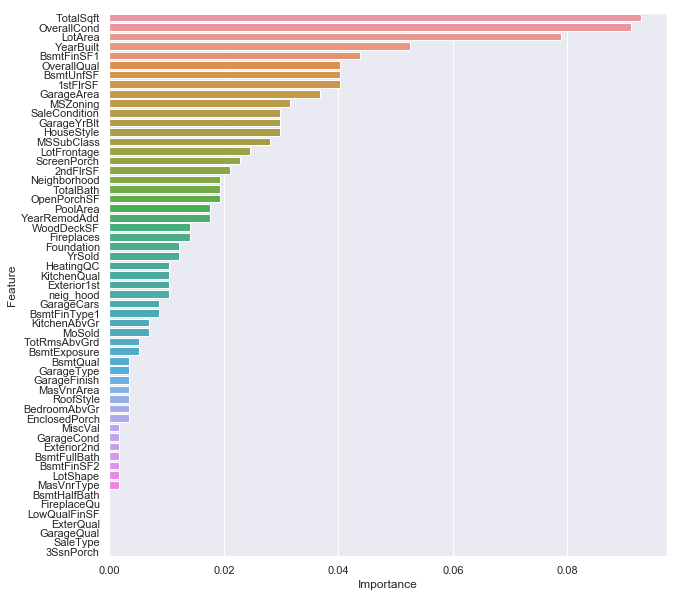

In [49]:
plt.figure(figsize= (10,10))
sns.barplot(x = features_xgb['Importance'],y=features_xgb['Feature'])
plt.show()

In [50]:
# For model interpretability pick the most relevant features
best_feat = []
for i,j in zip(features_xgb['Feature'],features_xgb['Importance']):
    if j >= 0.0087:
        best_feat.append(i)
len(best_feat)

32

In [51]:
data_train[best_feat].head()

,TotalSqft,OverallCond,LotArea,YearBuilt,BsmtFinSF1,OverallQual,BsmtUnfSF,1stFlrSF,GarageArea,MSZoning,...,WoodDeckSF,Fireplaces,Foundation,YrSold,HeatingQC,KitchenQual,Exterior1st,neig_hood,GarageCars,BsmtFinType1
0,2566,5,8450,2003,706,7,150,856,548,RL,...,0,0,PConc,2008,Ex,Gd,VinylSd,1,2,GLQ
1,2524,8,9600,1976,978,6,284,1262,460,RL,...,298,1,CBlock,2007,Ex,TA,MetalSd,1,2,ALQ
2,2706,5,11250,2001,486,7,434,920,608,RL,...,0,1,PConc,2008,Ex,Gd,VinylSd,1,2,GLQ
3,2473,5,9550,1915,216,7,540,961,642,RL,...,0,1,BrkTil,2006,Gd,Gd,Wd Sdng,1,3,ALQ
4,3343,5,14260,2000,655,8,490,1145,836,RL,...,192,1,PConc,2008,Ex,Gd,VinylSd,0,3,GLQ


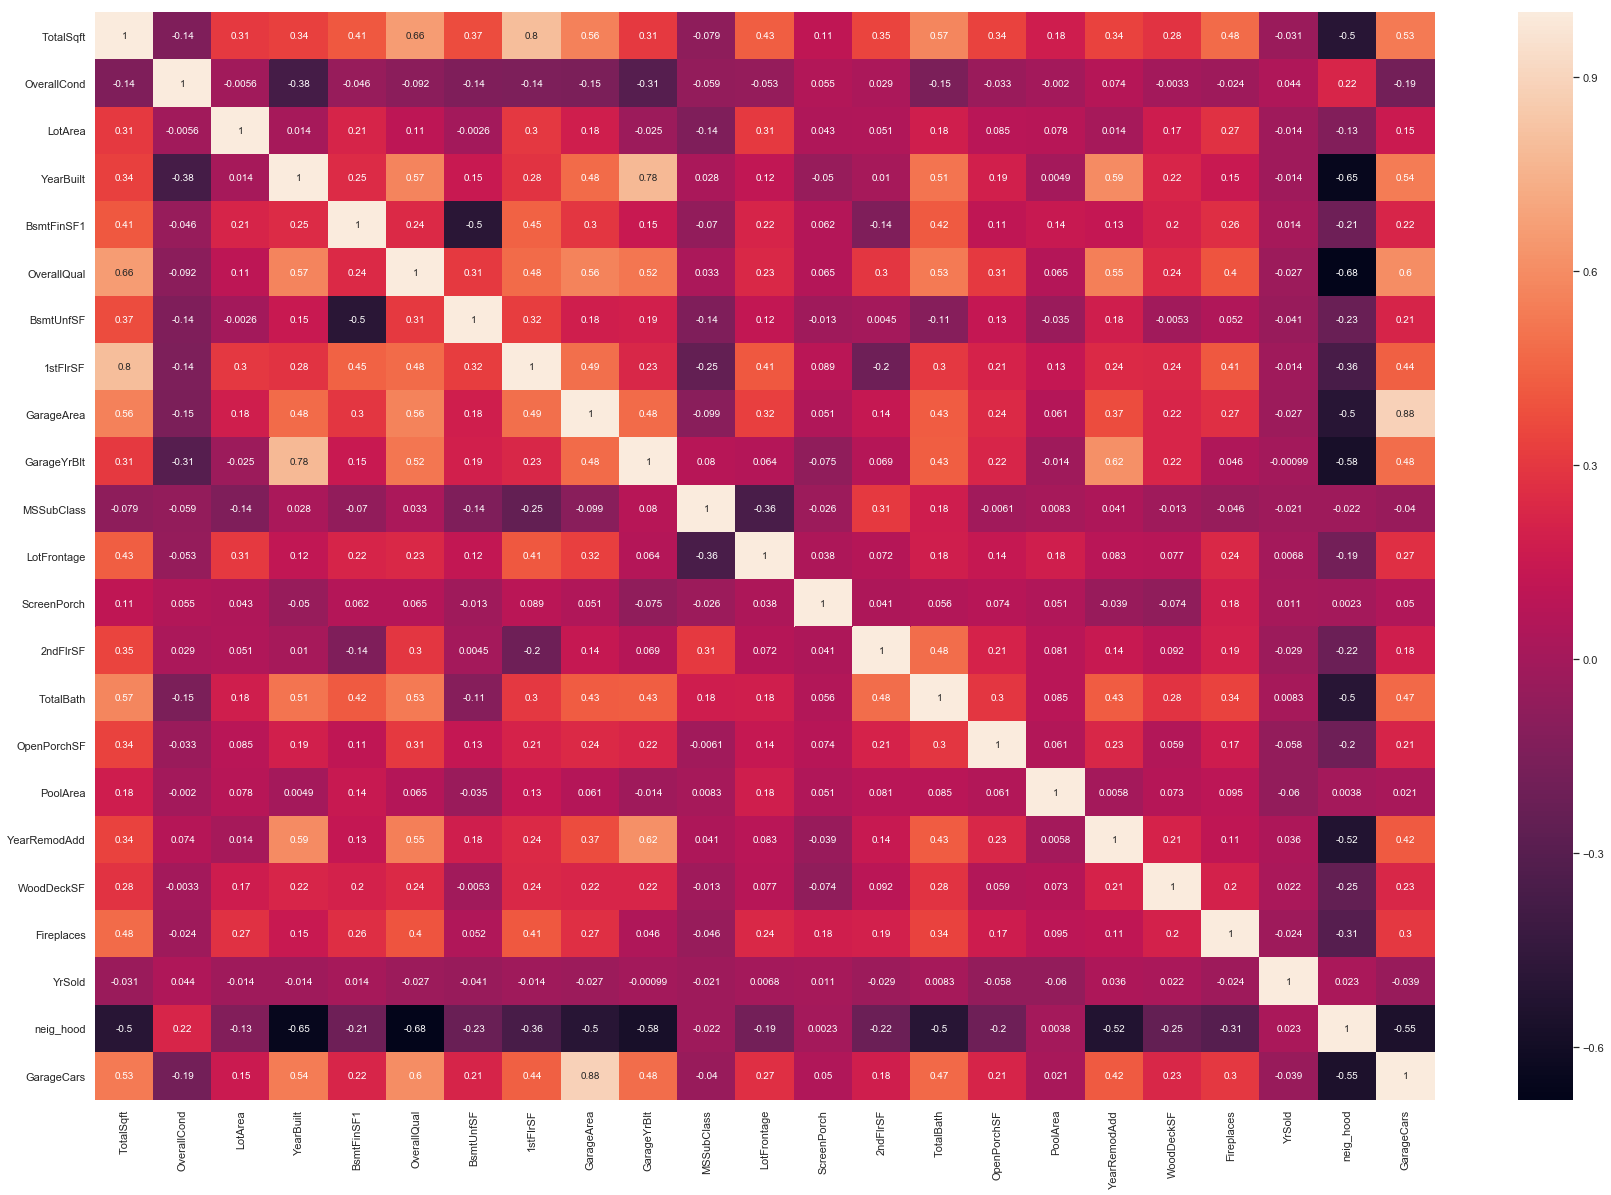

In [78]:
correl = data_train[best_feat].select_dtypes(exclude = 'object').corr()
fig, ax = plt.subplots(figsize = (30,20))
sns.heatmap(correl,annot=True)

In [53]:
# Drop features correlated with each other to address multi-collinearity
data_final = data_train[best_feat]
data_final = data_final.drop(columns =['1stFlrSF','GarageCars','GarageYrBlt'])
data_final.columns

Index(['TotalSqft', 'OverallCond', 'LotArea', 'YearBuilt', 'BsmtFinSF1',
       'OverallQual', 'BsmtUnfSF', 'GarageArea', 'MSZoning', 'SaleCondition',
       'HouseStyle', 'MSSubClass', 'LotFrontage', 'ScreenPorch', '2ndFlrSF',
       'Neighborhood', 'TotalBath', 'OpenPorchSF', 'PoolArea', 'YearRemodAdd',
       'WoodDeckSF', 'Fireplaces', 'Foundation', 'YrSold', 'HeatingQC',
       'KitchenQual', 'Exterior1st', 'neig_hood', 'BsmtFinType1'],
      dtype='object')

In [54]:
data_final.head()
data_final_copy = data_final.copy() 

In [55]:
data_final.select_dtypes(include = 
                         'object')

,MSZoning,SaleCondition,HouseStyle,Neighborhood,Foundation,HeatingQC,KitchenQual,Exterior1st,BsmtFinType1
0,RL,Normal,2Story,CollgCr,PConc,Ex,Gd,VinylSd,GLQ
1,RL,Normal,1Story,Veenker,CBlock,Ex,TA,MetalSd,ALQ
2,RL,Normal,2Story,CollgCr,PConc,Ex,Gd,VinylSd,GLQ
3,RL,Abnorml,2Story,Crawfor,BrkTil,Gd,Gd,Wd Sdng,ALQ
4,RL,Normal,2Story,NoRidge,PConc,Ex,Gd,VinylSd,GLQ
5,RL,Normal,1.5Fin,Mitchel,Wood,Ex,TA,VinylSd,GLQ
6,RL,Normal,1Story,Somerst,PConc,Ex,Gd,VinylSd,GLQ
7,RL,Normal,2Story,NWAmes,CBlock,Ex,TA,HdBoard,ALQ
8,RM,Abnorml,1.5Fin,OldTown,BrkTil,Gd,TA,BrkFace,Unf
9,RL,Normal,1.5Unf,BrkSide,BrkTil,Ex,TA,MetalSd,GLQ


# Models

In [56]:
# Scaling numeric features using sklearn Robust Scaler

In [57]:
num_cols2 = ['TotalSqft', 'OverallCond', 'LotArea', 'YearBuilt', 'BsmtFinSF1',
       'OverallQual', 'BsmtUnfSF', 'GarageArea',
       'MSSubClass', 'LotFrontage', '2ndFlrSF',
       'TotalBath', 'OpenPorchSF', 'YearRemodAdd',
       'WoodDeckSF', 'Fireplaces', 'YrSold']
data_final[num_cols2]

,TotalSqft,OverallCond,LotArea,YearBuilt,BsmtFinSF1,OverallQual,BsmtUnfSF,GarageArea,MSSubClass,LotFrontage,2ndFlrSF,TotalBath,OpenPorchSF,YearRemodAdd,WoodDeckSF,Fireplaces,YrSold
0,2566,5,8450,2003,706,7,150,548,60,65.000000,854,4,61,2003,0,0,2008
1,2524,8,9600,1976,978,6,284,460,20,80.000000,0,3,0,1976,298,1,2007
2,2706,5,11250,2001,486,7,434,608,60,68.000000,866,4,42,2002,0,1,2008
3,2473,5,9550,1915,216,7,540,642,70,60.000000,756,2,35,1970,0,1,2006
4,3343,5,14260,2000,655,8,490,836,60,84.000000,1053,4,84,2000,192,1,2008
5,2158,5,14115,1993,732,5,64,480,50,85.000000,566,3,30,1995,40,0,2009
6,3380,5,10084,2004,1369,8,317,636,20,75.000000,0,3,57,2005,255,1,2007
7,3197,6,10382,1973,859,7,216,484,60,70.049958,983,4,204,1973,235,2,2009
8,2726,5,6120,1931,0,7,952,468,50,51.000000,752,2,0,1950,90,2,2008
9,2068,6,7420,1939,851,5,140,205,190,50.000000,0,2,4,1950,0,2,2008


In [58]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
trans = scaler.fit_transform(data_final[num_cols2])
data_ = pd.DataFrame(trans,columns= num_cols2)
data_.head()
data_.shape

(1460, 17)

In [59]:
# One hot encoding categorical and ordinal features
cat_cols2 = ['neig_hood','MSZoning','SaleCondition','HouseStyle','Neighborhood','Foundation','HeatingQC','KitchenQual','Exterior1st','BsmtFinType1']

In [60]:
data_cat = pd.get_dummies(data_final[cat_cols2])
data_cat.head()
data_cat.shape

(1460, 81)

In [61]:
data_final1 =pd.concat([data_,data_cat],axis=1)
x = data_final1.columns.tolist()
X = data_final1[x]
Y = data_train[y].values
Y = Y.reshape(1460,)
data_final1.shape

(1460, 98)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge,Lasso,LinearRegression,ElasticNet
from sklearn.svm import SVR,LinearSVR

In [63]:
# Modeling
models = [Ridge(),Lasso(alpha=0.01),ElasticNet(alpha=0.01),SVR(),LinearSVR()]
names = ['Ridge','Lasso','ElasticNet','SVR','LinearSVR']


In [64]:
def rmse(model,X,Y):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring ='neg_mean_squared_error',cv=5))
    return rmse

In [65]:
for model,name in zip(models,names):
    score = rmse(model,X,Y)
    print('{}:{:.6f},{:.4f}'.format(name,score.mean(),score.std()))

Ridge:0.146235,0.0285
Lasso:0.153904,0.0249
ElasticNet:0.150433,0.0267
SVR:0.124139,0.0141
LinearSVR:0.151294,0.0380


In [66]:
sqft = ['TotalSqft','GarageArea','BsmtFinSF1','LotArea','BsmtUnfSF','2ndFlrSF','LotFrontage','OpenPorchSF']

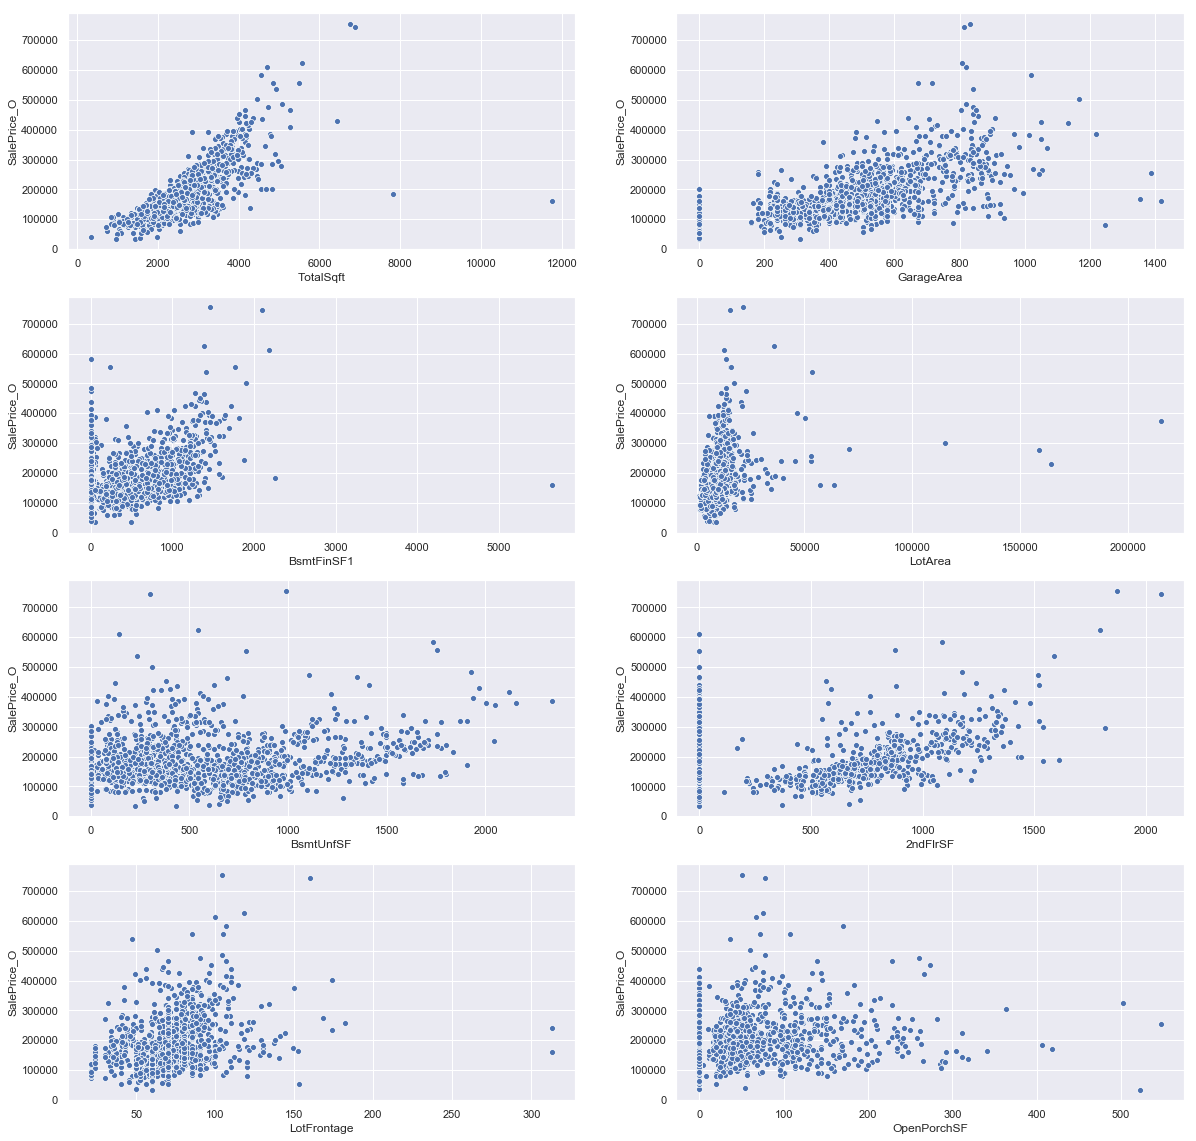

In [67]:
# Check for outliers
fig,axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flatten()
for i, xi in enumerate(data_final[sqft]):
    sns.scatterplot(x=xi, y = data_train['SalePrice_O'],ax = axes[i],data=data_final[sqft])

In [68]:
# check for outliers and replace with mean to see if score improves
values = [6000,1200,2000,50000,2000,2000,150,300] # Based on scatter plot
for i in range(len(sqft)):
    mean = data_final.loc[data_final[sqft[i]]<values[i], sqft[i]].mean()
    data_final[sqft[i]] = np.where(data_final[sqft[i]] >=values[i], mean,data_final[sqft[i]])
data_final.head()

,TotalSqft,OverallCond,LotArea,YearBuilt,BsmtFinSF1,OverallQual,BsmtUnfSF,GarageArea,MSZoning,SaleCondition,...,YearRemodAdd,WoodDeckSF,Fireplaces,Foundation,YrSold,HeatingQC,KitchenQual,Exterior1st,neig_hood,BsmtFinType1
0,2566.0,5,8450.0,2003,706.0,7,150.0,548.0,RL,Normal,...,2003,0,0,PConc,2008,Ex,Gd,VinylSd,1,GLQ
1,2524.0,8,9600.0,1976,978.0,6,284.0,460.0,RL,Normal,...,1976,298,1,CBlock,2007,Ex,TA,MetalSd,1,ALQ
2,2706.0,5,11250.0,2001,486.0,7,434.0,608.0,RL,Normal,...,2002,0,1,PConc,2008,Ex,Gd,VinylSd,1,GLQ
3,2473.0,5,9550.0,1915,216.0,7,540.0,642.0,RL,Abnorml,...,1970,0,1,BrkTil,2006,Gd,Gd,Wd Sdng,1,ALQ
4,3343.0,5,14260.0,2000,655.0,8,490.0,836.0,RL,Normal,...,2000,192,1,PConc,2008,Ex,Gd,VinylSd,0,GLQ


# Modeling after outlier treatment

In [69]:
scaler1 = RobustScaler()
trans1 = scaler.fit_transform(data_final[num_cols2])
data_1 = pd.DataFrame(trans1,columns= num_cols2)
data_1.head()
data_1.shape

(1460, 17)

In [70]:
data_final2 =pd.concat([data_1,data_cat],axis=1)
x = data_final2.columns.tolist()
X1 = data_final2[x]
Y1 = data_train[y].values
Y1= Y.reshape(1460,)
data_final2.shape

(1460, 98)

In [71]:
# Modeling after removing outliers
models1 = [Ridge(),Lasso(alpha=0.01),ElasticNet(alpha=0.01),SVR(),LinearSVR()]
names1 = ['Ridge','Lasso','ElasticNet','SVR','LinearSVR']
for model,name in zip(models1,names1):
    score = rmse(model,X1,Y1)
    print('{}:{:.6f},{:.4f}'.format(name,score.mean(),score.std()))
# We see some improvement in the error metric

Ridge:0.125610,0.0114
Lasso:0.136075,0.0103
ElasticNet:0.132661,0.0100
SVR:0.124723,0.0108
LinearSVR:0.133673,0.0136


# Ensemble Methods

In [72]:
data_final_copy[cat_cols2] = data_final_copy[cat_cols2].apply(LabelEncoder().fit_transform)
x_ = data_final_copy.columns.tolist()

In [73]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth = 100 ,n_estimators = 1000)
score_rf = rmse(model_rf,data_final_copy[x_],Y)
print('{:.6f},{:.4f}'.format(score_rf.mean(),score_rf.std()))

0.137361,0.0079


In [74]:
#Gradient Boosting
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=1000,learning_rate=0.1,reg_alpha=0.1)
score_xgb = rmse(model_xgb,data_final_copy[x_],Y)
print('{:.6f},{:.4f}'.format(score_xgb.mean(),score_xgb.std()))

0.124649,0.0113
